## Analyzing Distance's Impact on School Location Choice in Different Planning Districts

In this notebook, we look at the impact of distance on school location choice for students from different planning districts. First, we import the data.

In [1]:
import pandas as pd
full_df = pd.read_csv('../../Data/SMTO_2015/Formatted.csv')
full_df.head()

,Campus,Level,Status,Mode_Actual,Gender,Licence,Work,Age,HomeZone,Family,...,Closest.OC,Closest.RY,Closest.SC,Closest.SG,Closest.YG,Closest.YK,Time.Active,Time.Auto,Time.Transit,Exp_Factor
0,Scarborough (UTSC),UG,FT,Transit Bus,Female,0,Unknown,20,261,1,...,0,0,0,0,1,0,223.214700,17.474220,75.468478,[1.180745526182362]
1,Downtown Toronto (St. George),Grad,FT,Walk,Female,1,Unknown,25,71,0,...,0,0,0,1,0,0,16.985265,2.924953,24.128386,[0.7276973429613323]
2,Downtown Toronto (St. George),UG,FT,Transit Bus,Female,1,Unknown,23,3714,1,...,0,0,0,0,0,0,495.534450,67.715080,124.643180,[0.7276973429613323]
3,Downtown Toronto (St. George),UG,FT,Walk,Male,1,Unknown,20,74,0,...,0,0,0,1,0,0,10.491210,1.049121,16.675728,[0.7276973429613323]
4,Downtown Toronto (St. George),Grad,FT,Walk,Male,1,Unknown,27,71,0,...,0,0,0,1,0,0,16.985265,2.924953,24.128386,[0.7276973429613323]


Below is a map of planning districts 1-16, which are located in Toronto. Higher planning districts are located in the suburbs.

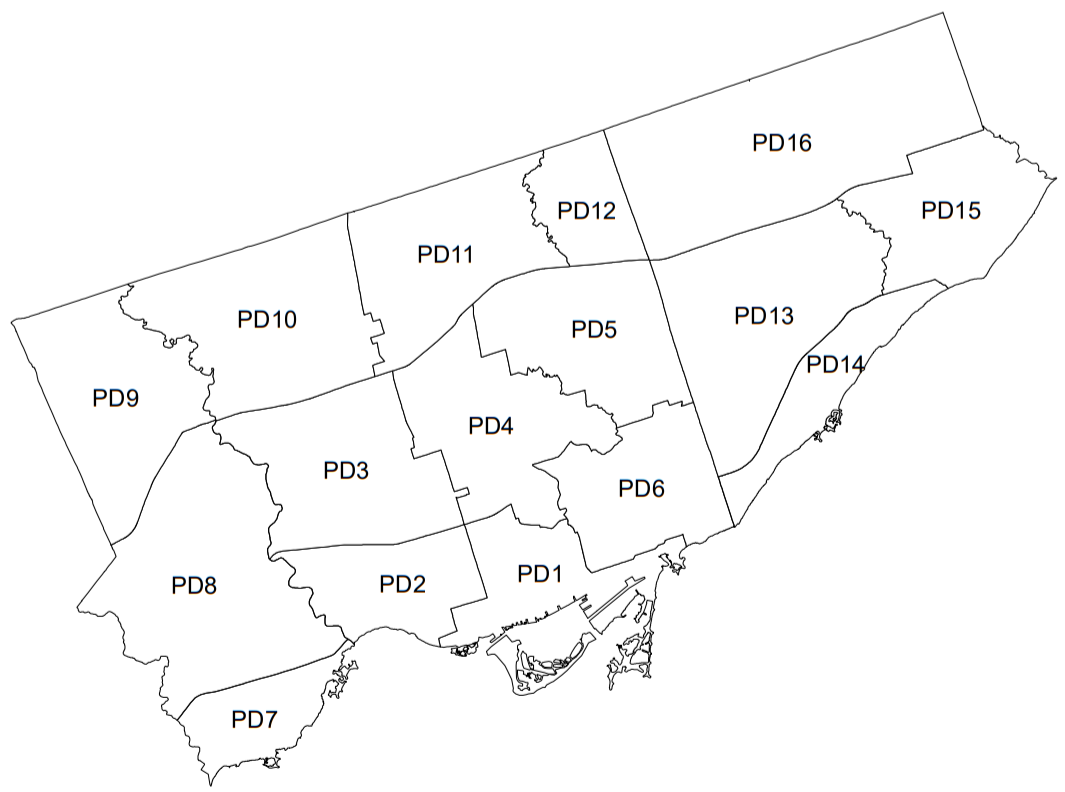

In [2]:
from IPython.display import Image
Image("Toronto_PDs.png")

We might expect that the proportion of students living with their family is higher in the suburbs. We confirm that family and planning district are somewhat correlated.

In [3]:
full_df[['PD', 'Family']].corr()

,PD,Family
PD,1.00000,0.51829
Family,0.51829,1.00000


We convert planning district and home zone information into a column containing the student's home region type. These types include Downtown, Midtown, Uptown, Inner Suburbs (Durham, York, and Peel) and Outer Suburbs (Halton and Hamilton).

In [4]:
school_codes = list(full_df['School'].unique())

def row_to_region(x):
    pd = x.PD
    if pd == 1:
        return 'Downtown'
    elif pd <= 6:
        return 'Midtown'
    elif pd <= 16:
        return 'Uptown'
    elif x.HomeZone < 4000:
        return 'Inner Suburbs' # Durham, York, Peel
    else:
        return 'Outer Suburbs' # Halton, Hamilton
    
temp = full_df[['Dist.' + code for code in school_codes]].rank(axis=1)
series = pd.DataFrame('Dist.' + full_df['School'])
series['Index'] = series.index
full_df['Dist_Rank'] = series.apply(lambda x: temp[x.School][x.Index], axis=1)
full_df['Region'] = full_df.apply(row_to_region, axis=1)

Finally, we look at the average distance rank of the chosen school of each student in each region. We observe the interaction of this average rank with the average distance from St. George (a proxy for downtown Toronto) and living arrangement distribution.

In [5]:
for level in (['UG', ' '], ['Grad'], ['UG', 'and', 'Grad']):
    df = full_df[full_df['Level'].isin(level)]
    print("------------------", *level, "------------------")
    #print(df.groupby('PD')['Dist_Rank'].mean())
       
    a = df.groupby('Region')['Dist.SG'].mean()
    b = df.groupby('Region')['Family'].mean()
    c = df.groupby('Region')['Dist_Rank'].mean()
    df_to_print = pd.concat((a, b, c), axis=1).sort_values('Dist.SG')
    print(df_to_print)
    print()
    
    corrs = df_to_print.corr().values
    print("Corr DistSG/Dist_Rank: {:.3f}".format(corrs[0][1]))
    print("Corr Family/Dist_Rank: {:.3f}".format(corrs[1][2]))
    print("\n")

------------------ UG   ------------------
                 Dist.SG    Family  Dist_Rank
Region                                       
Downtown        1.659088  0.107018   1.933798
Midtown         6.710915  0.562145   2.857143
Uptown         17.895630  0.746298   2.791708
Inner Suburbs  30.581246  0.907115   2.887193
Outer Suburbs  47.419125  0.876667   3.106667

Corr DistSG/Dist_Rank: 0.819
Corr Family/Dist_Rank: 0.931


------------------ Grad ------------------
                 Dist.SG    Family  Dist_Rank
Region                                       
Downtown        1.766608  0.057090   2.150092
Midtown         5.258355  0.176969   2.463167
Uptown         15.901302  0.454545   2.893939
Inner Suburbs  30.401947  0.712980   3.087751
Outer Suburbs  51.623390  0.580645   3.247312

Corr DistSG/Dist_Rank: 0.817
Corr Family/Dist_Rank: 0.952


------------------ UG and Grad ------------------
                 Dist.SG    Family  Dist_Rank
Region                                       
Downto

For both undergrad and graduate students, the correlation between distance from downtown and average distance rank of chosen school is strong. Interestingly, the average ranks for undergrads and graduate students are similar enough across each region, although in suburban regions undergrads exhibit a stronger preference for closer campuses.
Across both level, the proportion of students living with their family in each region is very strongly correlated with the average distance rank of chosen school. This, once again, confirms our hypothesis that living arrangement is clearly related to distance preferences.